#  CM3400 Assessment - Introduction to Data Science with Python 

## WRITTEN BY :- EN4L3

In [2]:
#Import Packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## LOAD DATASET FROM LOCAL DIRECTORY
Matches_Data = pd.read_csv('matches.csv')

##VIEW ATTRIBUTES AND DATATYPES
Matches_Data.shape


(205, 15)

In [4]:
Matches_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Day         205 non-null    object 
 1   Month       205 non-null    object 
 2   Training    200 non-null    object 
 3   Injuries    205 non-null    int64  
 4   OppPtsDiff  205 non-null    int64  
 5   RedCards    205 non-null    int64  
 6   Venue       205 non-null    object 
 7   Temp        205 non-null    float64
 8   Rain        205 non-null    float64
 9   Wind        205 non-null    float64
 10  Snow        205 non-null    object 
 11  Possession  200 non-null    object 
 12  KickOff     205 non-null    object 
 13  Supporters  205 non-null    int64  
 14  Result      205 non-null    object 
dtypes: float64(3), int64(4), object(8)
memory usage: 24.1+ KB


### Data Cleaning Task

###### Question 1


In [5]:
Matches_Data.isna().sum() #Identify Missing Data

Day           0
Month         0
Training      5
Injuries      0
OppPtsDiff    0
RedCards      0
Venue         0
Temp          0
Rain          0
Wind          0
Snow          0
Possession    5
KickOff       0
Supporters    0
Result        0
dtype: int64

In [6]:
Matches_Data = Matches_Data.dropna() #Remove Missing Rows
Matches_Data.isna().sum()

Day           0
Month         0
Training      0
Injuries      0
OppPtsDiff    0
RedCards      0
Venue         0
Temp          0
Rain          0
Wind          0
Snow          0
Possession    0
KickOff       0
Supporters    0
Result        0
dtype: int64

In [7]:
Matches_Data.shape

(198, 15)

In [8]:
Matches_Data.loc[Matches_Data.duplicated(keep=False), :] #Identify Location of Duplicate Data


,Day,Month,Training,Injuries,OppPtsDiff,RedCards,Venue,Temp,Rain,Wind,Snow,Possession,KickOff,Supporters,Result
15,Wed,May,8hr 0min,2,5,1,Away,16.4,7.7,7.6,No,40.70%,20:00,9796,Lose
46,Wed,Aug,13hr 30min,0,-12,0,Home,20.5,1.5,9.2,No,67.40%,17:30,10824,Win
61,Sat,Apr,9hr 30min,2,5,1,Away,10.6,7.2,9.9,No,39%,15:00,9793,Win
98,Sat,Sep,8hr 30min,0,-8,3,Home,11.7,7.9,9.9,No,51.60%,15:00,8190,Win
125,Wed,Aug,13hr 30min,0,-12,0,Home,20.5,1.5,9.2,No,67.40%,17:30,10824,Win
133,Wed,May,8hr 0min,2,5,1,Away,16.4,7.7,7.6,No,40.70%,20:00,9796,Lose
141,Sat,Apr,8hr 30min,2,1,1,Away,8.8,4.5,12.5,No,47.20%,12:30,8888,Lose
158,Sat,Apr,9hr 30min,2,5,1,Away,10.6,7.2,9.9,No,39%,15:00,9793,Win
165,Sat,Apr,8hr 30min,2,1,1,Away,8.8,4.5,12.5,No,47.20%,12:30,8888,Lose
196,Sat,Sep,8hr 30min,0,-8,3,Home,11.7,7.9,9.9,No,51.60%,15:00,8190,Win


In [9]:
Matches_Clean = Matches_Data.drop_duplicates()

In [10]:
Matches_Clean.shape

(193, 15)

###### Question 2

In [11]:
#Datatype Conversion for Possesion Column

In [12]:
Matches_Possession = Matches_Clean['Possession']
Matches_Possession_strip = Matches_Possession.str.replace('%', '')
Percent_Possession = round(Matches_Possession_strip.astype(float))
Matches_Clean = Matches_Clean.assign(Percent_POS=Percent_Possession)

In [13]:
#Datatype Conversion for Training Column

In [14]:
C = Matches_Clean['Training'].str.replace("hr","").str.replace("min","")
C1 = C.str.split(" ", expand=True).astype(float)
C1.columns =["hr","min"]
HR = C1["hr"] + C1["min"]/60
Matches_Clean = Matches_Clean.assign(HRS_Training=HR)



In [15]:
Matches_Clean.head(2)

,Day,Month,Training,Injuries,OppPtsDiff,RedCards,Venue,Temp,Rain,Wind,Snow,Possession,KickOff,Supporters,Result,Percent_POS,HRS_Training
0,Sat,Jan,4hr 0min,0,-11,0,Home,3.3,0.6,8.0,No,45.60%,12:30,10845,Win,46.0,4.00
1,Wed,Jan,4hr 45min,1,-19,0,Away,8.4,4.4,1.7,No,36%,18:00,6846,Lose,36.0,4.75


In [16]:
#Dropping Duplicated Columns

Matches_Clean = Matches_Clean.drop(columns=['Training','Possession'])

Matches_Clean = Matches_Clean.rename(columns={"Percent_POS": "Possession", "HRS_Training": "Training"})

### Data Exploration Tasks

###### Question 3

In [17]:
# Summarized Statistics For Numerical Columns Supporters

In [18]:
Matches_Clean["Supporters"].describe()
print("Measures of central location")
print("mean = ", Matches_Clean["Supporters"].mean())
print("median = ",Matches_Clean["Supporters"].median())

Measures of central location
mean =  9974.42487046632
median =  10120.0


SKEWNESS OF SUPPORTERS : -0.03982326360159741
KURTOSIS OF SUPPORTERS : 0.08648670841090578
Distribution by Supporters looks normally distributed


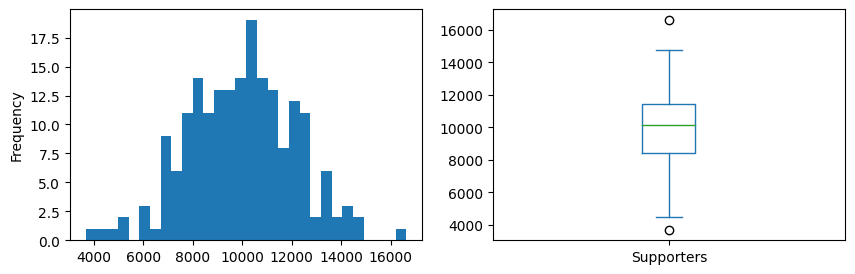

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
Matches_Clean['Supporters'].plot.hist(bins = 30, ax = ax[0])
Matches_Clean['Supporters'].plot.box()

print("SKEWNESS OF SUPPORTERS :", Matches_Clean['Supporters'].skew())
print("KURTOSIS OF SUPPORTERS :", Matches_Clean['Supporters'].kurtosis())
print("Distribution by Supporters looks normally distributed")

###### Question 4

In [20]:
# Summarized Statistics For Temp

In [35]:
print("Measures of central location")
print("mean = ", Matches_Clean["Temp"].mean())
print("median = ",Matches_Clean["Temp"].median())

Measures of central location
mean =  10.162176165803107
median =  10.2


SKEWNESS OF Temp : -0.03346514892720677
KURTOSIS OF Temp : 0.1294466721089509
Distribution by Temp looks normally distributed


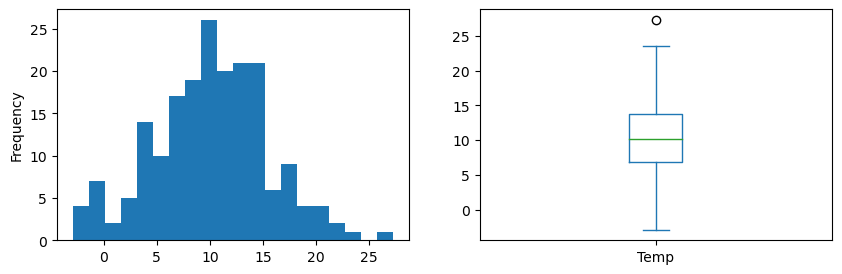

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
Matches_Clean['Temp'].plot.hist(bins = 20, ax = ax[0])
Matches_Clean['Temp'].plot.box()

print("SKEWNESS OF Temp :", Matches_Clean['Temp'].skew())
print("KURTOSIS OF Temp :", Matches_Clean['Temp'].kurtosis())
print("Distribution by Temp looks normally distributed")

In [21]:
# Summarized Statistics For Wind

In [36]:
print("Measures of central location")
print("mean = ", Matches_Clean["Wind"].mean())
print("median = ",Matches_Clean["Wind"].median())

Measures of central location
mean =  9.445595854922283
median =  8.4


SKEWNESS OF Wind : 0.9515335297050752
KURTOSIS OF Wind : 1.1948833925610498
Distribution by Wind is positively skewed distribution


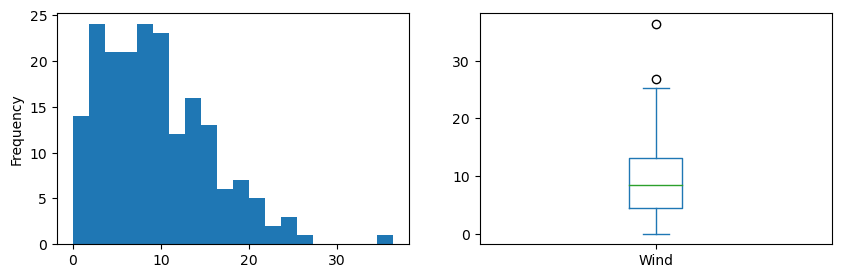

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
Matches_Clean['Wind'].plot.hist(bins = 20, ax = ax[0])
Matches_Clean['Wind'].plot.box()

print("SKEWNESS OF Wind :", Matches_Clean['Wind'].skew())
print("KURTOSIS OF Wind :", Matches_Clean['Wind'].kurtosis())
print("Distribution by Wind is positively skewed distribution")

###### Question 5

In [23]:
# Summarized Statistics For Result

In [24]:
Matches_Clean["Result"].value_counts()

Lose    96
Win     73
Draw    24
Name: Result, dtype: int64

Measures of central location
mode =  0    Lose
Name: Result, dtype: object


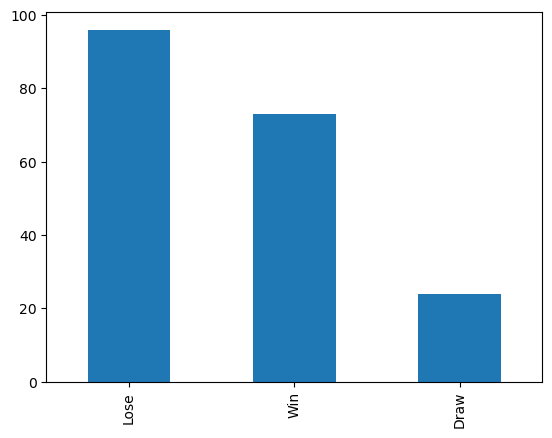

In [25]:
print("Measures of central location")
print("mode = ", Matches_Clean['Result'].mode())
Matches_Clean['Result'].value_counts().plot.bar()
plt.show()

###### Question 6

In [26]:
# Summarized Statistics For Result

In [27]:
Matches_Clean["Snow"].value_counts()

No     173
Yes     20
Name: Snow, dtype: int64

Measures of central location
mode =  0    No
Name: Snow, dtype: object


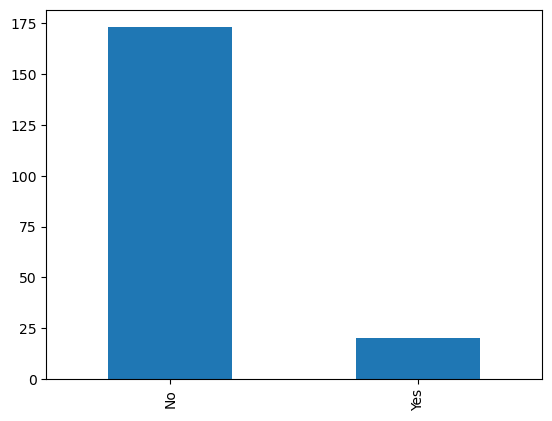

In [28]:
print("Measures of central location")
print("mode = ", Matches_Clean['Snow'].mode())
Matches_Clean['Snow'].value_counts().plot.bar()
plt.show()

### Bivariate Data Exploration Tasks

###### Question 7

In [29]:
# Statistics and distribution of Supporters against one of the categorical variables

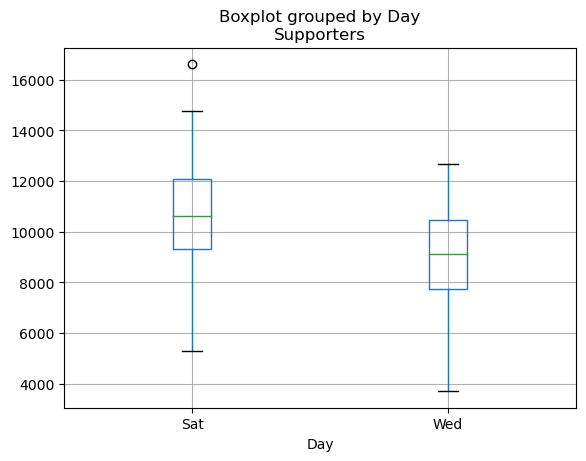

Supporters Attend Matches More On Saturday


In [30]:
Matches_Clean.boxplot('Supporters', by = 'Day')
plt.show()
print ("Supporters Attend Matches More On Saturday")

###### Question 8

In [31]:
#The correlation of Supporters against the other numerical variables. 

In [32]:
Matches_Clean.head(2)

,Day,Month,Injuries,OppPtsDiff,RedCards,Venue,Temp,Rain,Wind,Snow,KickOff,Supporters,Result,Possession,Training
0,Sat,Jan,0,-11,0,Home,3.3,0.6,8.0,No,12:30,10845,Win,46.0,4.00
1,Wed,Jan,1,-19,0,Away,8.4,4.4,1.7,No,18:00,6846,Lose,36.0,4.75


In [ ]:
print ("Correlation : Supporters ~ Rain")
#Matches_Clean.corr()
sns.heatmap(Matches_Clean.corr())


In [ ]:
Matches_Clean.plot.scatter(x = "Supporters", y = "Rain", color ="Brown")
plt.show()
print(" poor correlation ")

In [ ]:
Matches_Clean.plot.scatter(x = "Supporters", y = "Training", color ="Blue")
plt.show()
print("very low correlation")
print("little evidence to support relationship and training")

In [ ]:
Matches_Clean.boxplot('Supporters', by='KickOff')
plt.show()
print("More Supporters Attend Games At 19.00 and 14.00")


###### Question 9

In [ ]:
#The cross-tabulation of Results against a category that has a significant effect on the results

Result Is Poor When Games Are Played Away 


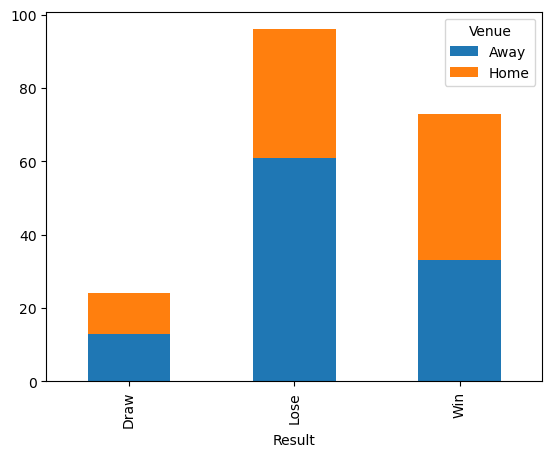

In [38]:
pd.crosstab(Matches_Clean['Result'],Matches_Clean['Venue']).plot.bar(stacked = True)
print("Result Is Poor When Games Are Played Away ")


### Data Transformation Tasks

###### Question 10

In [ ]:
#Create a new data frame called homeMatches

In [ ]:
homeMatches = Matches_Clean[(Matches_Clean["Venue"] =="Home") & (Matches_Clean["OppPtsDiff"] > 0 )]

In [ ]:
homeMatches.head(2)

In [ ]:
sns.scatterplot(x = "Supporters", y = "OppPtsDiff", hue="Day", data=homeMatches)

###### Question 11

In [ ]:
#In the homeMatches dataset create a new data column called InjuriesPerTrainingHour

In [ ]:
injury = homeMatches["Injuries"]
training = homeMatches["Training"]


In [ ]:
InJ = injury / training


In [ ]:
homeMatches= homeMatches.assign(InjuriesPerTrainingHour=InJ)

In [ ]:
homeMatches['InjuriesPerTrainingHour'] = round(homeMatches['InjuriesPerTrainingHour'],2)

In [ ]:
homeMatches.head(2)

###### Question 12

In [ ]:
#In homeMatches transform KickOff into a column of type datetime.

In [ ]:
KT = homeMatches["KickOff"].astype('datetime64[ns]')

In [ ]:
homeMatches = homeMatches.assign(KickOff_Date_Time=KT)

In [ ]:
homeMatches.head(2)

In [ ]:
homeMatches = homeMatches.drop(columns=['KickOff'])

homeMatches = homeMatches.rename(columns={"KickOff_Date_Time": "KickOff"})

In [ ]:
homeMatches.dtypes

In [ ]:
homeMatches.tail(2)

###### Question 13

In [ ]:
#Create a linear regression model to predict Supporters.

In [ ]:
AxP = homeMatches.plot.scatter(x='Supporters', y='Temp', title='Attendance')

In [ ]:
from statsmodels.formula.api import ols
model_A = ols("Supporters ~ Temp", data=Matches_Clean).fit()
model_A.summary()

In [ ]:
### Visualise the relationship between x and y on a scatterplot
ax = Matches_Clean.plot.scatter(x = 'Temp', y = 'Supporters')
fittedline = model_A.predict()
# Overlay best--fit line on same plot
ax.plot(Matches_Clean['Temp'], fittedline, 'r', )#linewidth=2)
plt.show()

In [ ]:
from statsmodels.formula.api import ols 
model_B = ols("Supporters ~ Temp + Rain + Wind", data = Matches_Clean).fit()
print(model_B.summary())

In [ ]:
Matches_Clean.dtypes

In [ ]:
Matches_Clean['Day'] = pd.Categorical(Matches_Clean.Day)
Matches_Clean['Month'] = pd.Categorical(Matches_Clean.Month)

In [ ]:
Matches_Clean.dtypes

In [ ]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

In [ ]:
Lr = LinearRegression()
y = Matches_Clean['Supporters']
x = Matches_Clean[['Day','Result']]


In [ ]:
x = pd.get_dummies(x)

In [ ]:
x.head()

In [ ]:
model_D = Lr.fit(x,y)
model_D.score(x,y)



In [ ]:
y_pred = model_D.predict(x)

In [ ]:
print("R^2(test) = ", metrics.r2_score(y, y_pred))
print("MSE(test) = ", metrics.mean_squared_error(y, y_pred))
print("MAE(test) = ", metrics.mean_absolute_error(y, y_pred))

In [ ]:
print("coef = ",Lr.coef_, '\n\n\n'" intercept=", Lr.intercept_)



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
yL = Matches_Clean['Supporters']
xL = Matches_Clean[['Day','Result','Month']]

In [ ]:
xT = pd.get_dummies(xL)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xT, yL, train_size=0.7, random_state=45)

In [ ]:
model_E = Lr.fit(X_train,y_train)

In [ ]:
y_pred = model_E.predict(X_test)
print("R^2(test) = ", metrics.r2_score(y_test, y_pred))
print("MSE(test) = ", metrics.mean_squared_error(y_test, y_pred))
print("MAE(test) = ", metrics.mean_absolute_error(y_test, y_pred))

###### Question 15

###### REFERENCES: